Saving train.csv.zip to train.csv.zip
Dataset Loaded Successfully!

Columns in dataset:
Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

Data Preview:
Date
2010-02-05    32412189.61
2010-02-12    33135624.24
2010-02-19    32731216.57
2010-02-26    29765485.51
2010-03-05    30540210.29
Name: Weekly_Sales, dtype: float64


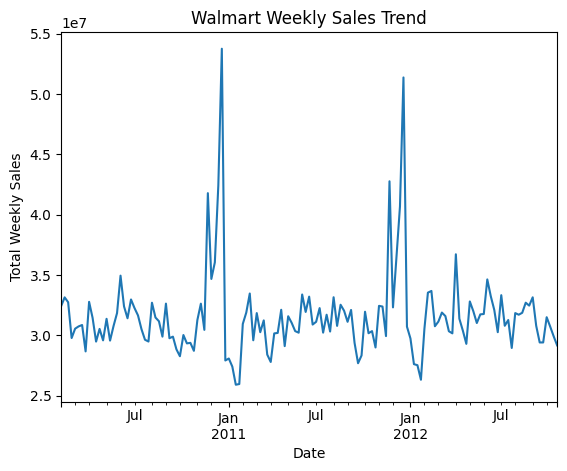

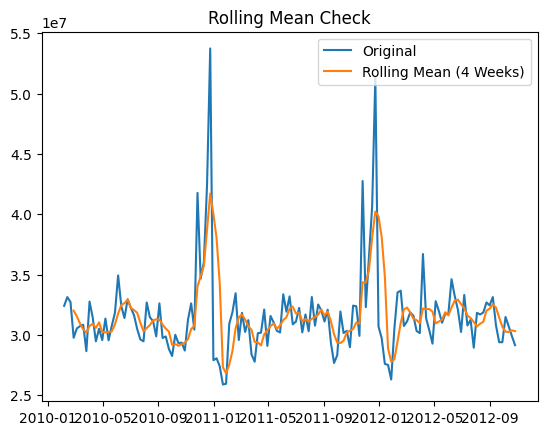

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


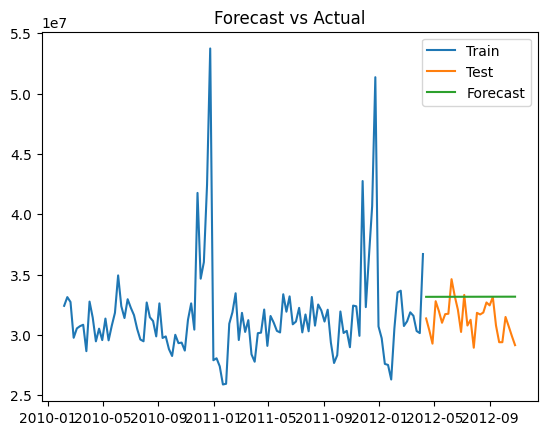


Model Performance:
MAE: 1925243.8656025291
MAPE: 6.315815164677302

Next 8 Weeks Forecast:
2012-04-13    3.315868e+07
2012-04-20    3.315914e+07
2012-04-27    3.315960e+07
2012-05-04    3.316005e+07
2012-05-11    3.316051e+07
2012-05-18    3.316097e+07
2012-05-25    3.316143e+07
2012-06-01    3.316189e+07
Freq: W-FRI, dtype: float64

 forecast_output.csv saved successfully!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
# =========================================
# TASK 16 – WALMART SALES FORECASTING
# COMPLETE CORRECT CODE (NO ERRORS)
# =========================================

# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error
from google.colab import files

# UPLOAD FILE (UPLOAD train.csv ONLY)
uploaded = files.upload()

# Automatically detect filename
file_name = list(uploaded.keys())[0]

# Read dataset
df = pd.read_csv(file_name)

print("Dataset Loaded Successfully!")
print("\nColumns in dataset:")
print(df.columns)

# CHECK IF Weekly_Sales COLUMN EXISTS
if 'Weekly_Sales' not in df.columns:
    print("\n ERROR: This file does NOT contain Weekly_Sales.")
    print("Please upload train.csv from Walmart dataset.")
else:

    # CONVERT DATE COLUMN
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')

    # AGGREGATE TOTAL WEEKLY SALES
    weekly_sales = df.groupby('Date')['Weekly_Sales'].sum()

    print("\nData Preview:")
    print(weekly_sales.head())

    # PLOT SALES TREND
    plt.figure()
    weekly_sales.plot()
    plt.title("Walmart Weekly Sales Trend")
    plt.xlabel("Date")
    plt.ylabel("Total Weekly Sales")
    plt.show()

    # ROLLING MEAN (Seasonality Check)
    rolling_mean = weekly_sales.rolling(window=4).mean()

    plt.figure()
    plt.plot(weekly_sales, label='Original')
    plt.plot(rolling_mean, label='Rolling Mean (4 Weeks)')
    plt.legend()
    plt.title("Rolling Mean Check")
    plt.show()

    #  TRAIN-TEST SPLIT (80%-20%)
    train_size = int(len(weekly_sales) * 0.8)
    train = weekly_sales[:train_size]
    test = weekly_sales[train_size:]

    #  APPLY EXPONENTIAL SMOOTHING
    model = ExponentialSmoothing(train, trend='add', seasonal=None)
    model_fit = model.fit()

    #  FORECAST ON TEST DATA
    forecast = model_fit.forecast(len(test))

    #  PLOT FORECAST VS ACTUAL
    plt.figure()
    plt.plot(train, label='Train')
    plt.plot(test, label='Test')
    plt.plot(forecast, label='Forecast')
    plt.legend()
    plt.title("Forecast vs Actual")
    plt.show()

    # CALCULATE ERROR METRICS
    mae = mean_absolute_error(test, forecast)
    mape = np.mean(np.abs((test - forecast) / test)) * 100

    print("\nModel Performance:")
    print("MAE:", mae)
    print("MAPE:", mape)

    #  FORECAST NEXT 8 WEEKS
    future_forecast = model_fit.forecast(8)

    print("\nNext 8 Weeks Forecast:")
    print(future_forecast)

    #  EXPORT FORECAST TO CSV
    forecast_df = pd.DataFrame({
        "Date": future_forecast.index,
        "Forecasted_Sales": future_forecast.values
    })

    forecast_df.to_csv("forecast_output.csv", index=False)

    print("\n forecast_output.csv saved successfully!")

    files.download("forecast_output.csv")
